**Installing Tensorflow**

- !pip install Tensorflow -- > in anaconda prompt
- pip install tensorflow -- > in jupyter notebook

**Installing Keras**

- !pip install Keras -- > in anaconda prompt
- !pip install -- upgrade keras -- > in jupyter notebook

In [ ]:
pip install tensorflow

In [ ]:
pip install --upgrade keras

In [ ]:
import keras

keras.__version__

# 1. Business Problem (Project) Understanding
- Predict the energy based on input variables with least possible error

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('energy.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# Data Preprocessing

In [6]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [10]:
X = df.drop(columns='PE')
y = df["PE"]

In [12]:
### Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state = 0)

In [14]:
X_train.shape

(7654, 4)

In [16]:
X_train

,AT,V,AP,RH
496,11.22,43.13,1017.24,80.90
294,13.67,54.30,1015.92,75.42
6796,32.84,77.95,1014.68,45.80
6785,31.91,67.83,1008.76,53.22
1203,10.37,37.50,1013.19,79.25
...,...,...,...,...
7891,16.21,50.90,1012.46,84.45
9225,13.85,44.90,1019.11,76.79
4859,16.81,38.52,1018.26,75.21
3264,12.80,41.16,1022.43,86.19


# Modelling
- ML Algo

In [ ]:
#modelling
from sklearn. linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

### Predicting the results
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

#evaluation
from sklearn.metrics import r2_score
print("R2 for train data: ",r2_score(y_train,ypred_train))
print("R2 for test data: ",r2_score(y_test, ypred_test))

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.predict([[15.2,995,80,50]])

In [ ]:
-1.97313099*15.2 +0.06387891*995 -0.15807019*80 -0.23649993*50 + 452.8410371616378

# DL Modelling
- Design the model + fit on train data

**Perceptron**

In [ ]:
import tensorflow as tf
import keras

- Design a perceptron Model

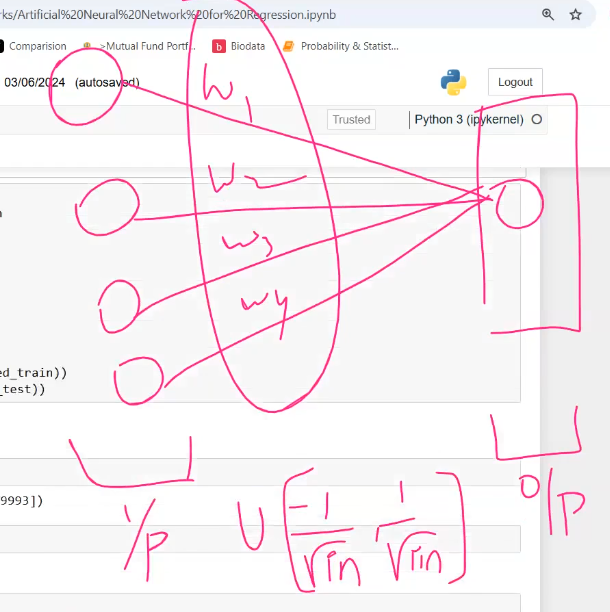

In [ ]:
from keras.models import Sequential

p_model = Sequential()

from keras.layers import Dense

p_model.add(Dense(input_dim=4, units=1, activation='relu', kernel_initializer="uniform"))

p_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#fit on train data
p_model.fit(X_train, y_train, batch_size = 32, epochs = 100)

In [ ]:
# p_model.predict([[15.2,995,80,50]])               # Lr.predict([[15.2,995,80,50]])

In [ ]:
### Predicting the results
ypred_train = p_model.predict(X_train)
ypred_test = p_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print("R2 for train data: ",r2_score(y_train, ypred_train))
print("R2 for test data: ",r2_score(y_test, ypred_test))

# After completing the perceptron model restart the kernal to go with ANN

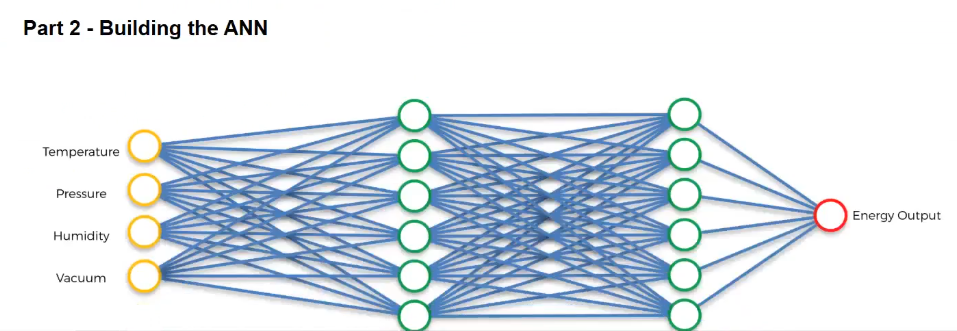

In [18]:
from keras.models import Sequential
from keras.layers import Dense

**Design (Adding layers + Compile)**

In [20]:
ann_model=Sequential()
ann_model.add(Dense(input_dim=4, units=6, activation='relu', kernel_initializer="uniform"))
ann_model.add(Dense(units=6, activation='relu',kernel_initializer="uniform"))
ann_model.add(Dense(units=1, activation='relu', kernel_initializer="uniform"))
ann_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann_model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 183011.0156
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 860.9320
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 426.8952
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 406.4683
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 377.1208
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 365.4460
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 339.2535
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 312.5952
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 281.0437
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 252.9061
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 232.4268
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 201.8879
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 176.1145
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154.4764
Epoch 15/100
240/240 ━

In [ ]:
### Training the ANN model on the Training set

In [22]:
### Predicting the results
ypred_train = ann_model.predict(X_train)
ypred_test = ann_model.predict(X_test)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


In [24]:
from sklearn.metrics import mean_squared_error
print("MSE for train data: ", mean_squared_error(y_train, ypred_train))
print("MSE for test data: ", mean_squared_error(y_test, ypred_test))

MSE for train data:  26.92280041562466
MSE for test data:  25.726140198308016


In [26]:
from sklearn.metrics import r2_score
print("R2 for train data: ",r2_score(y_train, ypred_train))
print("R2 for test data: ",r2_score(y_test, ypred_test))

R2 for train data:  0.9074575109669227
R2 for test data:  0.912043726009588
